In [2]:
import pandas as pd
from textparser import TextParser
import os
import re
import numpy as np
import nltk
from glob import glob
from nltk.stem.porter import PorterStemmer
from numpy.linalg import norm

In [3]:
os.getcwd()

'/Users/michaelhammer/Desktop/ETA_Final'

# Parsing Data

In [4]:
source_files = '/Users/michaelhammer/Desktop/ETA_Final/novels'
output_dir = '/Users/michaelhammer/Desktop/ETA_Final/output'

In [5]:
OHCO = ['book_id', 'chap_id', 'para_num', 'sent_num', 'token_num']
SENT = OHCO[:4]
PARA = OHCO[:3]
CHAP = OHCO[:2]
BOOK = OHCO[:1]

In [6]:
clip_pats = [
    r"\s*START OF BOOK",
    r"\s*THE END"
]

ohco_pat_list = [
    (1,  rf"^CHAPTER\s"),
    (2,   rf"^CHAPTER\s"),
    (3,   rf"^CHAPTER\s"),
    (4,   rf"^CHAPTER\s"),
    (5,   rf"^CHAPTER\s"),
    (6,   rf"^CHAPTER\s"),
    (7,   rf"^CHAPTER\s|^EPILOGUE\s")
]

In [7]:
source_file_list = sorted(glob(f"{source_files}/*.*"))
source_file_list

["/Users/michaelhammer/Desktop/ETA_Final/novels/Book1_The_Sorcerer's_Stone.txt",
 '/Users/michaelhammer/Desktop/ETA_Final/novels/Book2_The_Chamber_of_Secrets.txt',
 '/Users/michaelhammer/Desktop/ETA_Final/novels/Book3_The_Prisoner_of_Azkaban.txt',
 '/Users/michaelhammer/Desktop/ETA_Final/novels/Book4_The_Goblet_of_Fire.txt',
 '/Users/michaelhammer/Desktop/ETA_Final/novels/Book5_The_Order_Of_The_Phoenix.txt',
 '/Users/michaelhammer/Desktop/ETA_Final/novels/Book6_The_Half_Blood_Prince.txt',
 '/Users/michaelhammer/Desktop/ETA_Final/novels/Book7_The_Deathly_Hallows.txt']

In [8]:
book_data = []
for source_file_path in source_file_list:
    book_id = int(source_file_path.split('/')[-1].split('_')[0].replace('Book',''))
    book_title = 'Harry Potter And ' + source_file_path.split('/')[-1].split('-')[0].replace('_', ' ')[6:].split('.')[0]
    book_data.append((book_id, source_file_path, book_title))
book_data 

[(1,
  "/Users/michaelhammer/Desktop/ETA_Final/novels/Book1_The_Sorcerer's_Stone.txt",
  "Harry Potter And The Sorcerer's Stone"),
 (2,
  '/Users/michaelhammer/Desktop/ETA_Final/novels/Book2_The_Chamber_of_Secrets.txt',
  'Harry Potter And The Chamber of Secrets'),
 (3,
  '/Users/michaelhammer/Desktop/ETA_Final/novels/Book3_The_Prisoner_of_Azkaban.txt',
  'Harry Potter And The Prisoner of Azkaban'),
 (4,
  '/Users/michaelhammer/Desktop/ETA_Final/novels/Book4_The_Goblet_of_Fire.txt',
  'Harry Potter And The Goblet of Fire'),
 (5,
  '/Users/michaelhammer/Desktop/ETA_Final/novels/Book5_The_Order_Of_The_Phoenix.txt',
  'Harry Potter And The Order Of The Phoenix'),
 (6,
  '/Users/michaelhammer/Desktop/ETA_Final/novels/Book6_The_Half_Blood_Prince.txt',
  'Harry Potter And The Half Blood Prince'),
 (7,
  '/Users/michaelhammer/Desktop/ETA_Final/novels/Book7_The_Deathly_Hallows.txt',
  'Harry Potter And The Deathly Hallows')]

In [9]:
LIB = pd.DataFrame(book_data, columns=['book_id','source_file_path','title'])\
    .set_index('book_id').sort_index()
LIB

,source_file_path,title
book_id,,
1,/Users/michaelhammer/Desktop/ETA_Final/novels/...,Harry Potter And The Sorcerer's Stone
2,/Users/michaelhammer/Desktop/ETA_Final/novels/...,Harry Potter And The Chamber of Secrets
3,/Users/michaelhammer/Desktop/ETA_Final/novels/...,Harry Potter And The Prisoner of Azkaban
4,/Users/michaelhammer/Desktop/ETA_Final/novels/...,Harry Potter And The Goblet of Fire
5,/Users/michaelhammer/Desktop/ETA_Final/novels/...,Harry Potter And The Order Of The Phoenix
6,/Users/michaelhammer/Desktop/ETA_Final/novels/...,Harry Potter And The Half Blood Prince
7,/Users/michaelhammer/Desktop/ETA_Final/novels/...,Harry Potter And The Deathly Hallows


In [10]:
books = []
for pat in ohco_pat_list:
    
    book_id, chap_regex = pat
    print("Tokenizing", book_id, LIB.loc[book_id].title)
    ohco_pats = [('chap', chap_regex, 'm')]
    src_file_path = LIB.loc[book_id].source_file_path
    
    text = TextParser(src_file_path, ohco_pats=ohco_pats, clip_pats=clip_pats, use_nltk=True)
    text.verbose = False
    text.strip_hyphens = True
    text.strip_whitespace = True
    text.import_source().parse_tokens();
    text.TOKENS['book_id'] = book_id
    text.TOKENS = text.TOKENS.reset_index().set_index(['book_id'] + text.OHCO)
    
    books.append(text.TOKENS)

Tokenizing 1 Harry Potter And The Sorcerer's Stone
line_str chap_str
Index(['chap_str'], dtype='object')
Tokenizing 2 Harry Potter And The Chamber of Secrets
line_str chap_str
Index(['chap_str'], dtype='object')
Tokenizing 3 Harry Potter And The Prisoner of Azkaban
line_str chap_str
Index(['chap_str'], dtype='object')
Tokenizing 4 Harry Potter And The Goblet of Fire
line_str chap_str
Index(['chap_str'], dtype='object')
Tokenizing 5 Harry Potter And The Order Of The Phoenix
line_str chap_str
Index(['chap_str'], dtype='object')
Tokenizing 6 Harry Potter And The Half Blood Prince
line_str chap_str
Index(['chap_str'], dtype='object')
Tokenizing 7 Harry Potter And The Deathly Hallows
line_str chap_str
Index(['chap_str'], dtype='object')


In [11]:
CORPUS = pd.concat(books).sort_index()
CORPUS

pos_tuple  pos token_str  \
book_id chap_id para_num sent_num token_num                                   
1       1       1        0        0               (Mr., NNP)  NNP       Mr.   
                                  1                (and, CC)   CC       and   
                                  2              (Mrs., NNP)  NNP      Mrs.   
                                  3          (Dursley,, NNP)  NNP  Dursley,   
                                  4                 (of, IN)   IN        of   
...                                                      ...  ...       ...   
7       36      285      0        7           (nineteen, JJ)   JJ  nineteen   
                                  8             (years., NN)   NN    years.   
                         1        0                (All, DT)   DT       All   
                                  1               (was, VBD)  VBD       was   
                                  2              (well., JJ)   JJ     well.   

                                             term_str  
book_id chap_id para_num sent_num token_num            
1       1       1        0        0                mr  
                                  1               and  
                                  2               mrs  
                                  3           dursley  
                                  4                of  
...                                               ...  
7       36      285      0        7          nineteen  
                                  8             years  
                         1        0               all  
                                  1               was  
                                  2              well  

[1103221 rows x 4 columns]

## Add to LIB

In [12]:
LIB['book_len'] = CORPUS.groupby('book_id').term_str.count()

In [13]:
LIB['n_chaps'] = CORPUS.reset_index()[['book_id','chap_id']]\
    .drop_duplicates()\
    .groupby('book_id').chap_id.count()

In [14]:
LIB['chap_regex'] = LIB.index.map(pd.Series({x[0]:x[1] for x in ohco_pat_list}))

In [15]:
LIB.sort_values('book_len')

,source_file_path,title,book_len,n_chaps,chap_regex
book_id,,,,,
1,/Users/michaelhammer/Desktop/ETA_Final/novels/...,Harry Potter And The Sorcerer's Stone,77946,17,^CHAPTER\s
2,/Users/michaelhammer/Desktop/ETA_Final/novels/...,Harry Potter And The Chamber of Secrets,87122,18,^CHAPTER\s
3,/Users/michaelhammer/Desktop/ETA_Final/novels/...,Harry Potter And The Prisoner of Azkaban,105599,22,^CHAPTER\s
6,/Users/michaelhammer/Desktop/ETA_Final/novels/...,Harry Potter And The Half Blood Prince,172720,30,^CHAPTER\s
4,/Users/michaelhammer/Desktop/ETA_Final/novels/...,Harry Potter And The Goblet of Fire,192543,37,^CHAPTER\s
7,/Users/michaelhammer/Desktop/ETA_Final/novels/...,Harry Potter And The Deathly Hallows,201393,36,^CHAPTER\s|^EPILOGUE\s
5,/Users/michaelhammer/Desktop/ETA_Final/novels/...,Harry Potter And The Order Of The Phoenix,263038,38,^CHAPTER\s


In [16]:
LIB['release_year'] = [1997, 1998, 1999, 2000, 2003, 2005, 2007]
LIB

,source_file_path,title,book_len,n_chaps,chap_regex,release_year
book_id,,,,,,
1,/Users/michaelhammer/Desktop/ETA_Final/novels/...,Harry Potter And The Sorcerer's Stone,77946,17,^CHAPTER\s,1997
2,/Users/michaelhammer/Desktop/ETA_Final/novels/...,Harry Potter And The Chamber of Secrets,87122,18,^CHAPTER\s,1998
3,/Users/michaelhammer/Desktop/ETA_Final/novels/...,Harry Potter And The Prisoner of Azkaban,105599,22,^CHAPTER\s,1999
4,/Users/michaelhammer/Desktop/ETA_Final/novels/...,Harry Potter And The Goblet of Fire,192543,37,^CHAPTER\s,2000
5,/Users/michaelhammer/Desktop/ETA_Final/novels/...,Harry Potter And The Order Of The Phoenix,263038,38,^CHAPTER\s,2003
6,/Users/michaelhammer/Desktop/ETA_Final/novels/...,Harry Potter And The Half Blood Prince,172720,30,^CHAPTER\s,2005
7,/Users/michaelhammer/Desktop/ETA_Final/novels/...,Harry Potter And The Deathly Hallows,201393,36,^CHAPTER\s|^EPILOGUE\s,2007


## VOCAB Table

In [17]:
CORPUS[CORPUS.term_str == ''].token_str.value_counts()

token_str
—                    3751
…                    3331
—”                   1985
…”                   1507
"                     810
?”                    218
."                    187
“                     179
“—                    170
”                     113
..."                  105
“…                     90
..                     62
?"                     41
*                      27
…’                     21
"...                   19
!”                     16
—’                     12
.."                    10
"),                     7
".                      7
.'                      6
!"                      4
‘—                      2
....                    2
‘…                      2
‘                       2
.'"                     2
'"                      2
**                      2
",                      1
(?)                     1
–                       1
—————————————————       1
";                      1
/                       1
'.                      1
"'

In [18]:
CORPUS = CORPUS[CORPUS.term_str != '']

In [19]:
VOCAB = CORPUS.term_str.value_counts().to_frame('n').sort_index()
VOCAB.index.name = 'term_str'
VOCAB['n_chars'] = VOCAB.index.str.len()
VOCAB['p'] = VOCAB.n / VOCAB.n.sum()
VOCAB['i'] = -np.log2(VOCAB.p)

In [20]:
VOCAB['max_pos'] = CORPUS[['term_str','pos']].value_counts().unstack(fill_value=0).idxmax(1)

In [21]:
CORPUS['pos_group'] = CORPUS.pos.str[:2]

/var/folders/sf/rkz3brtd51l115fp6dy92h8r0000gn/T/ipykernel_97834/236658476.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CORPUS['pos_group'] = CORPUS.pos.str[:2]


In [22]:
VOCAB['max_pos_group'] = CORPUS[['term_str','pos_group']].value_counts().unstack(fill_value=0).idxmax(1)

In [23]:
TPM = CORPUS[['term_str','pos']].value_counts().unstack()

In [24]:
VOCAB['n_pos'] = TPM.count(1)

In [25]:
VOCAB['cat_pos'] = CORPUS[['term_str','pos']].value_counts().to_frame('n').reset_index()\
    .groupby('term_str').pos.apply(lambda x: set(x))

In [26]:
sw = pd.DataFrame(nltk.corpus.stopwords.words('english'), columns=['term_str'])
sw = sw.reset_index().set_index('term_str')
sw.columns = ['dummy']
sw.dummy = 1

In [27]:
VOCAB['stop'] = VOCAB.index.map(sw.dummy)
VOCAB['stop'] = VOCAB['stop'].fillna(0).astype('int')

In [28]:
stemmer1 = PorterStemmer()
VOCAB['porter_stem'] = VOCAB.apply(lambda x: stemmer1.stem(x.name), 1)

In [29]:
VOCAB

,n,n_chars,p,i,max_pos,max_pos_group,n_pos,cat_pos,stop,porter_stem
term_str,,,,,,,,,,
0,6,1,5.516460e-06,17.467826,CD,CD,2,"{CD, JJ}",0,0
1,12,1,1.103292e-05,16.467826,CD,CD,1,{CD},0,1
10,1,2,9.194100e-07,20.052788,CD,CD,1,{CD},0,10
11,4,2,3.677640e-06,18.052788,CD,CD,1,{CD},0,11
12,1,2,9.194100e-07,20.052788,CD,CD,1,{CD},0,12
...,...,...,...,...,...,...,...,...,...,...
zoological,1,10,9.194100e-07,20.052788,JJ,JJ,1,{JJ},0,zoolog
zoom,8,4,7.355280e-06,17.052788,NN,NN,2,"{VB, NN}",0,zoom
zoomed,57,6,5.240637e-05,14.219898,VBD,VB,2,"{VBN, VBD}",0,zoom


# Derived Tables

## BOW Table

In [30]:
def create_bow(CORPUS, bag, item_type='term_str'):
    BOW = CORPUS.groupby(bag+[item_type])[item_type].count().to_frame('n')
    return BOW

In [31]:
bag = CHAP
bag

['book_id', 'chap_id']

In [32]:
BOW = create_bow(CORPUS, bag)
BOW

n
book_id chap_id term_str     
1       1       a         112
                able        2
                about      14
                above       1
                across      2
...                       ...
7       36      your       23
                youre       4
                yours       3
                youve       5
                zooming     1

[281416 rows x 1 columns]

# DTM

In [33]:
DTM = BOW.n.unstack(fill_value=0)
DTM

term_str         0  1  10  11  12  1230  125  1289  1296  12th  ...  zombie  \
book_id chap_id                                                 ...           
1       1        0  0   0   0   0     0    0     0     0     0  ...       0   
        2        0  0   0   0   0     0    0     0     0     0  ...       0   
        3        0  0   0   0   0     0    0     0     0     0  ...       0   
        4        0  1   0   0   0     0    0     0     0     0  ...       0   
        5        2  2   0   0   0     0    0     0     0     0  ...       0   
...             .. ..  ..  ..  ..   ...  ...   ...   ...   ...  ...     ...   
7       32       0  0   0   0   0     0    0     0     0     0  ...       0   
        33       0  0   0   0   0     0    0     0     0     0  ...       0   
        34       0  0   0   0   0     0    0     0     0     0  ...       0   
        35       0  0   0   0   0     0    0     0     0     0  ...       0   
        36       0  0   0   0   0     0    0     0     0     0  ...       0   

term_str         zone  zonko  zonkos  zoo  zoological  zoom  zoomed  zooming  \
book_id chap_id                                                                
1       1           0      0       0    0           0     0       0        0   
        2           0      0       0    6           0     0       0        0   
        3           0      0       0    0           0     0       0        0   
        4           0      0       0    0           0     0       0        0   
        5           0      0       0    0           0     0       0        0   
...               ...    ...     ...  ...         ...   ...     ...      ...   
7       32          0      0       0    0           0     0       1        1   
        33          0      0       0    0           0     0       0        0   
        34          0      0       0    0           0     0       0        0   
        35          0      0       0    0           0     0       0        0   
        36          0      0       0    0           0     0       0        1   

term_str         éclairs  
book_id chap_id           
1       1              0  
        2              0  
        3              0  
        4              0  
        5              0  
...                  ...  
7       32             0  
        33             0  
        34             0  
        35             0  
        36             0  

[198 rows x 21615 columns]

# TFIDF & DFIDF

In [34]:
def get_tfidf(BOW, tf_method='max', df_method='standard', item_type='term_str'):
            
    DTCM = BOW.n.unstack() # Create Doc-Term Count Matrix
    
    if tf_method == 'sum':
        TF = (DTCM.T / DTCM.T.sum()).T
    elif tf_method == 'max':
        TF = (DTCM.T / DTCM.T.max()).T
    elif tf_method == 'log':
        TF = (np.log2(DTCM.T + 1)).T
    elif tf_method == 'raw':
        TF = DTCM
    elif tf_method == 'bool':
        TF = DTCM.astype('bool').astype('int')
    else:
        raise ValueError(f"TF method {tf_method} not found.")

    DF = DTCM.count() # Assumes NULLs 
    N_docs = len(DTCM)
    
    if df_method == 'standard':
        IDF = np.log2(N_docs/DF) # This what the students were asked to use
    elif df_method == 'textbook':
        IDF = np.log2(N_docs/(DF + 1))
    elif df_method == 'sklearn':
        IDF = np.log2(N_docs/DF) + 1
    elif df_method == 'sklearn_smooth':
        IDF = np.log2((N_docs + 1)/(DF + 1)) + 1
    else:
        raise ValueError(f"DF method {df_method} not found.")
    
    TFIDF = TF * IDF
    
    DFIDF = DF * IDF
    
    TFIDF = TFIDF.fillna(0)

    return TFIDF, DFIDF

In [35]:
tf_method = 'max'

In [36]:
TFIDF, DFIDF = get_tfidf(BOW, tf_method)
TFIDF

term_str               0         1   10   11   12  1230  125  1289  1296  \
book_id chap_id                                                            
1       1        0.00000  0.000000  0.0  0.0  0.0   0.0  0.0   0.0   0.0   
        2        0.00000  0.000000  0.0  0.0  0.0   0.0  0.0   0.0   0.0   
        3        0.00000  0.000000  0.0  0.0  0.0   0.0  0.0   0.0   0.0   
        4        0.00000  0.035675  0.0  0.0  0.0   0.0  0.0   0.0   0.0   
        5        0.04109  0.032551  0.0  0.0  0.0   0.0  0.0   0.0   0.0   
...                  ...       ...  ...  ...  ...   ...  ...   ...   ...   
7       32       0.00000  0.000000  0.0  0.0  0.0   0.0  0.0   0.0   0.0   
        33       0.00000  0.000000  0.0  0.0  0.0   0.0  0.0   0.0   0.0   
        34       0.00000  0.000000  0.0  0.0  0.0   0.0  0.0   0.0   0.0   
        35       0.00000  0.000000  0.0  0.0  0.0   0.0  0.0   0.0   0.0   
        36       0.00000  0.000000  0.0  0.0  0.0   0.0  0.0   0.0   0.0   

term_str         12th  ...  zombie  zone  zonko  zonkos       zoo  zoological  \
book_id chap_id        ...                                                      
1       1         0.0  ...     0.0   0.0    0.0     0.0  0.000000         0.0   
        2         0.0  ...     0.0   0.0    0.0     0.0  0.187645         0.0   
        3         0.0  ...     0.0   0.0    0.0     0.0  0.000000         0.0   
        4         0.0  ...     0.0   0.0    0.0     0.0  0.000000         0.0   
        5         0.0  ...     0.0   0.0    0.0     0.0  0.000000         0.0   
...               ...  ...     ...   ...    ...     ...       ...         ...   
7       32        0.0  ...     0.0   0.0    0.0     0.0  0.000000         0.0   
        33        0.0  ...     0.0   0.0    0.0     0.0  0.000000         0.0   
        34        0.0  ...     0.0   0.0    0.0     0.0  0.000000         0.0   
        35        0.0  ...     0.0   0.0    0.0     0.0  0.000000         0.0   
        36        0.0  ...     0.0   0.0    0.0     0.0  0.000000         0.0   

term_str         zoom    zoomed   zooming  éclairs  
book_id chap_id                                     
1       1         0.0  0.000000  0.000000      0.0  
        2         0.0  0.000000  0.000000      0.0  
        3         0.0  0.000000  0.000000      0.0  
        4         0.0  0.000000  0.000000      0.0  
        5         0.0  0.000000  0.000000      0.0  
...               ...       ...       ...      ...  
7       32        0.0  0.006542  0.008202      0.0  
        33        0.0  0.000000  0.000000      0.0  
        34        0.0  0.000000  0.000000      0.0  
        35        0.0  0.000000  0.000000      0.0  
        36        0.0  0.000000  0.005959      0.0  

[198 rows x 21615 columns]

In [37]:
VOCAB['dfidf'] = DFIDF

In [38]:
VOCAB.dfidf.sort_values(ascending=False).head(20)

term_str
information    105.08584
fall           105.08584
itll           105.08584
whisper        105.08584
twice          105.08584
lupin          105.08584
send           105.08584
living         105.08584
fat            105.08584
pressed        105.08584
forget         105.08584
join           105.08584
pretty         105.08584
distant        105.08584
forest         105.08584
letter         105.08584
touch          105.08584
hoping         105.08584
sideways       105.08584
definitely     105.08584
Name: dfidf, dtype: float64

In [39]:
VOCAB['df'] = DTM.astype('bool').sum()
VOCAB['idf'] = np.log2(len(DTM) / VOCAB.df)

In [40]:
TFIDF

term_str               0         1   10   11   12  1230  125  1289  1296  \
book_id chap_id                                                            
1       1        0.00000  0.000000  0.0  0.0  0.0   0.0  0.0   0.0   0.0   
        2        0.00000  0.000000  0.0  0.0  0.0   0.0  0.0   0.0   0.0   
        3        0.00000  0.000000  0.0  0.0  0.0   0.0  0.0   0.0   0.0   
        4        0.00000  0.035675  0.0  0.0  0.0   0.0  0.0   0.0   0.0   
        5        0.04109  0.032551  0.0  0.0  0.0   0.0  0.0   0.0   0.0   
...                  ...       ...  ...  ...  ...   ...  ...   ...   ...   
7       32       0.00000  0.000000  0.0  0.0  0.0   0.0  0.0   0.0   0.0   
        33       0.00000  0.000000  0.0  0.0  0.0   0.0  0.0   0.0   0.0   
        34       0.00000  0.000000  0.0  0.0  0.0   0.0  0.0   0.0   0.0   
        35       0.00000  0.000000  0.0  0.0  0.0   0.0  0.0   0.0   0.0   
        36       0.00000  0.000000  0.0  0.0  0.0   0.0  0.0   0.0   0.0   

term_str         12th  ...  zombie  zone  zonko  zonkos       zoo  zoological  \
book_id chap_id        ...                                                      
1       1         0.0  ...     0.0   0.0    0.0     0.0  0.000000         0.0   
        2         0.0  ...     0.0   0.0    0.0     0.0  0.187645         0.0   
        3         0.0  ...     0.0   0.0    0.0     0.0  0.000000         0.0   
        4         0.0  ...     0.0   0.0    0.0     0.0  0.000000         0.0   
        5         0.0  ...     0.0   0.0    0.0     0.0  0.000000         0.0   
...               ...  ...     ...   ...    ...     ...       ...         ...   
7       32        0.0  ...     0.0   0.0    0.0     0.0  0.000000         0.0   
        33        0.0  ...     0.0   0.0    0.0     0.0  0.000000         0.0   
        34        0.0  ...     0.0   0.0    0.0     0.0  0.000000         0.0   
        35        0.0  ...     0.0   0.0    0.0     0.0  0.000000         0.0   
        36        0.0  ...     0.0   0.0    0.0     0.0  0.000000         0.0   

term_str         zoom    zoomed   zooming  éclairs  
book_id chap_id                                     
1       1         0.0  0.000000  0.000000      0.0  
        2         0.0  0.000000  0.000000      0.0  
        3         0.0  0.000000  0.000000      0.0  
        4         0.0  0.000000  0.000000      0.0  
        5         0.0  0.000000  0.000000      0.0  
...               ...       ...       ...      ...  
7       32        0.0  0.006542  0.008202      0.0  
        33        0.0  0.000000  0.000000      0.0  
        34        0.0  0.000000  0.000000      0.0  
        35        0.0  0.000000  0.000000      0.0  
        36        0.0  0.000000  0.005959      0.0  

[198 rows x 21615 columns]

# TFIDF - L2 Normalized

In [41]:
vocab_filter = 'dfidf'
n_terms = 1000
pos_list = "NN NNS VB VBD VBG VBN VBP VBZ JJ JJR JJS RB RBR RBS".split() # Open categories with no proper nouns

In [42]:
VIDX = VOCAB.loc[VOCAB.max_pos.isin(pos_list)]\
    .sort_values(vocab_filter, ascending=False)\
    .head(n_terms).index

In [43]:
M = TFIDF[VIDX].fillna(0).groupby('book_id').mean()

In [44]:
M

term_str,letter,send,pressed,join,living,whisper,itll,information,distant,fall,...,search,nowhere,yell,armchair,children,cracked,including,staggered,lap,chosen
book_id,,,,,,,,,,,,,,,,,,,,,
1,0.019019,0.008422,0.002558,0.002356,0.004988,0.003336,0.003313,0.000580,0.001271,0.004616,...,0.002039,0.001867,0.002982,0.001492,0.000982,0.001379,0.000528,0.000604,0.002366,0.002406
2,0.007485,0.001634,0.000782,0.002395,0.002263,0.003063,0.006667,0.001377,0.002681,0.001981,...,0.000378,0.000880,0.000971,0.001104,0.000482,0.002580,0.001047,0.000000,0.001901,0.000522
3,0.006874,0.003288,0.002105,0.003480,0.003290,0.002821,0.002422,0.002608,0.002667,0.004231,...,0.003385,0.002356,0.001664,0.003321,0.003593,0.000990,0.001619,0.002380,0.002657,0.000659
4,0.010839,0.006021,0.003020,0.003217,0.006293,0.001807,0.001162,0.004602,0.001963,0.003213,...,0.001724,0.001961,0.002039,0.003009,0.002432,0.001667,0.003525,0.002928,0.002149,0.002261
5,0.008324,0.001913,0.002360,0.004010,0.002553,0.002872,0.002747,0.004314,0.002559,0.001947,...,0.001384,0.002234,0.002054,0.003365,0.002405,0.001909,0.003215,0.001525,0.002345,0.002005
6,0.002074,0.003219,0.004269,0.003694,0.003694,0.003694,0.002705,0.005259,0.003687,0.002719,...,0.002170,0.002196,0.002339,0.005359,0.003530,0.002615,0.003553,0.004453,0.003407,0.012424
7,0.004277,0.002216,0.003091,0.002781,0.007333,0.002011,0.002707,0.003564,0.003309,0.002062,...,0.002898,0.003015,0.001887,0.001616,0.003675,0.004461,0.001690,0.002643,0.001519,0.001756


In [45]:
L2 = M.apply(lambda x: x / norm(x), 1)
L2

term_str,letter,send,pressed,join,living,whisper,itll,information,distant,fall,...,search,nowhere,yell,armchair,children,cracked,including,staggered,lap,chosen
book_id,,,,,,,,,,,,,,,,,,,,,
1,0.119315,0.052836,0.016048,0.014781,0.031290,0.020927,0.020783,0.003639,0.007975,0.028958,...,0.012793,0.011713,0.018710,0.009358,0.006162,0.008649,0.003315,0.003787,0.014846,0.015092
2,0.059842,0.013064,0.006255,0.019148,0.018095,0.024488,0.053297,0.011008,0.021437,0.015833,...,0.003020,0.007036,0.007763,0.008826,0.003851,0.020627,0.008366,0.000000,0.015201,0.004175
3,0.054056,0.025854,0.016552,0.027367,0.025870,0.022182,0.019049,0.020508,0.020969,0.033272,...,0.026620,0.018525,0.013083,0.026116,0.028253,0.007782,0.012734,0.018712,0.020896,0.005181
4,0.098786,0.054873,0.027526,0.029320,0.057349,0.016468,0.010589,0.041939,0.017893,0.029286,...,0.015715,0.017870,0.018582,0.027421,0.022162,0.015189,0.032124,0.026685,0.019583,0.020602
5,0.072017,0.016548,0.020416,0.034698,0.022088,0.024852,0.023770,0.037323,0.022141,0.016843,...,0.011978,0.019331,0.017771,0.029115,0.020808,0.016518,0.027818,0.013195,0.020285,0.017344
6,0.017177,0.026664,0.035364,0.030599,0.030599,0.030599,0.022406,0.043562,0.030541,0.022524,...,0.017977,0.018188,0.019372,0.044391,0.029242,0.021658,0.029428,0.036888,0.028218,0.102916
7,0.043499,0.022537,0.031440,0.028281,0.074571,0.020454,0.027531,0.036248,0.033648,0.020975,...,0.029476,0.030663,0.019188,0.016434,0.037377,0.045369,0.017192,0.026876,0.015449,0.017858


In [46]:
VOCAB['mean_tfidf'] = TFIDF.mean()

## Save Tables

In [47]:
LIB.head(10)

,source_file_path,title,book_len,n_chaps,chap_regex,release_year
book_id,,,,,,
1,/Users/michaelhammer/Desktop/ETA_Final/novels/...,Harry Potter And The Sorcerer's Stone,77946,17,^CHAPTER\s,1997
2,/Users/michaelhammer/Desktop/ETA_Final/novels/...,Harry Potter And The Chamber of Secrets,87122,18,^CHAPTER\s,1998
3,/Users/michaelhammer/Desktop/ETA_Final/novels/...,Harry Potter And The Prisoner of Azkaban,105599,22,^CHAPTER\s,1999
4,/Users/michaelhammer/Desktop/ETA_Final/novels/...,Harry Potter And The Goblet of Fire,192543,37,^CHAPTER\s,2000
5,/Users/michaelhammer/Desktop/ETA_Final/novels/...,Harry Potter And The Order Of The Phoenix,263038,38,^CHAPTER\s,2003
6,/Users/michaelhammer/Desktop/ETA_Final/novels/...,Harry Potter And The Half Blood Prince,172720,30,^CHAPTER\s,2005
7,/Users/michaelhammer/Desktop/ETA_Final/novels/...,Harry Potter And The Deathly Hallows,201393,36,^CHAPTER\s|^EPILOGUE\s,2007


In [48]:
LIB.to_csv(f"{output_dir}LIB.csv", index=True, header=True, sep='|')

In [49]:
CORPUS.head()

pos_tuple  pos token_str  \
book_id chap_id para_num sent_num token_num                                   
1       1       1        0        0               (Mr., NNP)  NNP       Mr.   
                                  1                (and, CC)   CC       and   
                                  2              (Mrs., NNP)  NNP      Mrs.   
                                  3          (Dursley,, NNP)  NNP  Dursley,   
                                  4                 (of, IN)   IN        of   

                                            term_str pos_group  
book_id chap_id para_num sent_num token_num                     
1       1       1        0        0               mr        NN  
                                  1              and        CC  
                                  2              mrs        NN  
                                  3          dursley        NN  
                                  4               of        IN

In [50]:
CORPUS.to_csv(f"{output_dir}CORPUS.csv", index=True, header=True, sep='|')

In [51]:
VOCAB.head()

,n,n_chars,p,i,max_pos,max_pos_group,n_pos,cat_pos,stop,porter_stem,dfidf,df,idf,mean_tfidf
term_str,,,,,,,,,,,,,,
0,6,1,5.516460e-06,17.467826,CD,CD,2,"{CD, JJ}",0,0,22.517426,4,5.629357,0.000700
1,12,1,1.103292e-05,16.467826,CD,CD,1,{CD},0,1,40.134885,9,4.459432,0.001128
10,1,2,9.194100e-07,20.052788,CD,CD,1,{CD},0,10,7.629357,1,7.629357,0.000155
11,4,2,3.677640e-06,18.052788,CD,CD,1,{CD},0,11,22.517426,4,5.629357,0.000483
12,1,2,9.194100e-07,20.052788,CD,CD,1,{CD},0,12,7.629357,1,7.629357,0.000142


In [52]:
VOCAB.to_csv(f"{output_dir}VOCAB.csv", index=True, header=True, sep='|')

In [53]:
BOW.head()

n
book_id chap_id term_str     
1       1       a         112
                able        2
                about      14
                above       1
                across      2

In [54]:
BOW.to_csv(f"{output_dir}BOW.csv", index=True, header=True, sep='|')

In [55]:
DTM.head()

term_str         0  1  10  11  12  1230  125  1289  1296  12th  ...  zombie  \
book_id chap_id                                                 ...           
1       1        0  0   0   0   0     0    0     0     0     0  ...       0   
        2        0  0   0   0   0     0    0     0     0     0  ...       0   
        3        0  0   0   0   0     0    0     0     0     0  ...       0   
        4        0  1   0   0   0     0    0     0     0     0  ...       0   
        5        2  2   0   0   0     0    0     0     0     0  ...       0   

term_str         zone  zonko  zonkos  zoo  zoological  zoom  zoomed  zooming  \
book_id chap_id                                                                
1       1           0      0       0    0           0     0       0        0   
        2           0      0       0    6           0     0       0        0   
        3           0      0       0    0           0     0       0        0   
        4           0      0       0    0           0     0       0        0   
        5           0      0       0    0           0     0       0        0   

term_str         éclairs  
book_id chap_id           
1       1              0  
        2              0  
        3              0  
        4              0  
        5              0  

[5 rows x 21615 columns]

In [56]:
DTM.to_csv(f"{output_dir}DTM.csv", index=True, header=True, sep='|')

In [57]:
TFIDF.head()

term_str               0         1   10   11   12  1230  125  1289  1296  \
book_id chap_id                                                            
1       1        0.00000  0.000000  0.0  0.0  0.0   0.0  0.0   0.0   0.0   
        2        0.00000  0.000000  0.0  0.0  0.0   0.0  0.0   0.0   0.0   
        3        0.00000  0.000000  0.0  0.0  0.0   0.0  0.0   0.0   0.0   
        4        0.00000  0.035675  0.0  0.0  0.0   0.0  0.0   0.0   0.0   
        5        0.04109  0.032551  0.0  0.0  0.0   0.0  0.0   0.0   0.0   

term_str         12th  ...  zombie  zone  zonko  zonkos       zoo  zoological  \
book_id chap_id        ...                                                      
1       1         0.0  ...     0.0   0.0    0.0     0.0  0.000000         0.0   
        2         0.0  ...     0.0   0.0    0.0     0.0  0.187645         0.0   
        3         0.0  ...     0.0   0.0    0.0     0.0  0.000000         0.0   
        4         0.0  ...     0.0   0.0    0.0     0.0  0.000000         0.0   
        5         0.0  ...     0.0   0.0    0.0     0.0  0.000000         0.0   

term_str         zoom  zoomed  zooming  éclairs  
book_id chap_id                                  
1       1         0.0     0.0      0.0      0.0  
        2         0.0     0.0      0.0      0.0  
        3         0.0     0.0      0.0      0.0  
        4         0.0     0.0      0.0      0.0  
        5         0.0     0.0      0.0      0.0  

[5 rows x 21615 columns]

In [58]:
TFIDF.to_csv(f"{output_dir}TFIDF.csv", index=True, header=True, sep='|')

In [59]:
L2.head()

term_str,letter,send,pressed,join,living,whisper,itll,information,distant,fall,...,search,nowhere,yell,armchair,children,cracked,including,staggered,lap,chosen
book_id,,,,,,,,,,,,,,,,,,,,,
1,0.119315,0.052836,0.016048,0.014781,0.031290,0.020927,0.020783,0.003639,0.007975,0.028958,...,0.012793,0.011713,0.018710,0.009358,0.006162,0.008649,0.003315,0.003787,0.014846,0.015092
2,0.059842,0.013064,0.006255,0.019148,0.018095,0.024488,0.053297,0.011008,0.021437,0.015833,...,0.003020,0.007036,0.007763,0.008826,0.003851,0.020627,0.008366,0.000000,0.015201,0.004175
3,0.054056,0.025854,0.016552,0.027367,0.025870,0.022182,0.019049,0.020508,0.020969,0.033272,...,0.026620,0.018525,0.013083,0.026116,0.028253,0.007782,0.012734,0.018712,0.020896,0.005181
4,0.098786,0.054873,0.027526,0.029320,0.057349,0.016468,0.010589,0.041939,0.017893,0.029286,...,0.015715,0.017870,0.018582,0.027421,0.022162,0.015189,0.032124,0.026685,0.019583,0.020602
5,0.072017,0.016548,0.020416,0.034698,0.022088,0.024852,0.023770,0.037323,0.022141,0.016843,...,0.011978,0.019331,0.017771,0.029115,0.020808,0.016518,0.027818,0.013195,0.020285,0.017344


In [60]:
L2.to_csv(f"{output_dir}L2.csv", index=True, header=True, sep='|')

# Models

## PCA Components

In [61]:
from sklearn.decomposition import PCA
import plotly_express as px
import seaborn as sns

In [62]:
pca = PCA(n_components=5)
pca.fit(L2)

PCA(n_components=5)

In [63]:
component_terms = pd.DataFrame(pca.components_[0], index=L2.columns, columns=['weight'])
component_terms.nlargest(5, 'weight')


,weight
term_str,
yeh,0.387750
ter,0.353332
points,0.145003
broom,0.140199
dog,0.123506


In [64]:
component_terms = pd.DataFrame(pca.components_[1], index=L2.columns, columns=['weight'])
component_terms.nsmallest(5, 'weight')

,weight
term_str,
sir,-0.451375
team,-0.152378
class,-0.143980
potion,-0.122926
trunk,-0.102620


In [65]:
components = pd.DataFrame(pca.components_)
components.to_csv(f"{output_dir}components.csv", index=False, header=True, sep='|')


## PCA DCM

In [66]:
pca_engine = PCA(n_components=5)

In [67]:
DCM = pd.DataFrame(pca_engine.fit_transform(L2.fillna(0)), index=L2.index)
DCM.columns = ['PC{}'.format(i) for i in DCM.columns]
DCM = DCM.join(LIB[['title', 'release_year']], on='book_id')
DCM

,PC0,PC1,PC2,PC3,PC4,title,release_year
book_id,,,,,,,
1,0.502736,0.215225,-0.157080,0.025435,-0.033474,Harry Potter And The Sorcerer's Stone,1997
2,0.020576,-0.310681,-0.182649,-0.241561,-0.041807,Harry Potter And The Chamber of Secrets,1998
3,0.136628,-0.097139,0.392110,-0.025286,-0.135177,Harry Potter And The Prisoner of Azkaban,1999
4,-0.097535,0.003704,0.020198,-0.037642,0.299841,Harry Potter And The Goblet of Fire,2000
5,-0.017180,0.011485,0.086805,0.118388,0.161176,Harry Potter And The Order Of The Phoenix,2003
6,-0.185404,-0.138432,-0.141807,0.297056,-0.126046,Harry Potter And The Half Blood Prince,2005
7,-0.359819,0.315837,-0.017577,-0.136391,-0.124513,Harry Potter And The Deathly Hallows,2007


In [68]:
DCM.to_csv(f"{output_dir}DCM.csv", index=False, header=True, sep='|')

## PCA Loadings

In [69]:
LOADINGS = pd.DataFrame(pca_engine.components_.T * np.sqrt(pca_engine.explained_variance_))
LOADINGS.columns = ["PC{}".format(i) for i in LOADINGS.columns]
LOADINGS.index = L2.columns
LOADINGS.index.name = 'term_str'
LOADINGS

,PC0,PC1,PC2,PC3,PC4
term_str,,,,,
letter,0.023789,0.011278,-0.002857,-0.008433,0.019740
send,0.007141,0.006757,-0.001817,0.002177,0.007106
pressed,-0.006390,0.004133,-0.000344,0.005817,0.000135
join,-0.004735,-0.000175,0.003066,0.003154,0.002001
living,-0.011524,0.014407,-0.000542,-0.004646,0.002301
...,...,...,...,...,...
cracked,-0.009951,0.004917,-0.003501,-0.003187,-0.003349
including,-0.007141,-0.001041,0.001277,0.005956,0.006052
staggered,-0.009101,0.002061,0.002269,0.007153,-0.000522


In [70]:
LOADINGS.to_csv(f"{output_dir}LOADINGS.csv", index=False, header=True, sep='|')

## PCA Viz 1

In [130]:
def vis_pcs(M, a, b, label='author', hover_name='label', symbol=None, size=None):
    return px.scatter(M, f"PC{a}", f"PC{b}", color=label, hover_name=hover_name, 
                     symbol=symbol, size=label,
                     marginal_x='box', height=800)

In [72]:
def vis_loadings(a=0, b=1, hover_name='term_str'):
    X = LOADINGS.join(VOCAB)
    return px.scatter(X.reset_index(), f"PC{a}", f"PC{b}", 
                      text='term_str', size='i', color='max_pos_group', 
                      marginal_x='box', height=800)

In [73]:
vis_pcs(DCM, 0, 1, label = 'release_year', hover_name='title')

In [74]:
vis_loadings(0,1, hover_name = 'release_year')

## PCA Viz 2

In [75]:
vis_pcs(DCM, 2, 3, label = 'release_year', hover_name='title')

In [76]:
vis_loadings(2,3, hover_name = 'release_year')

## LDA Topic

In [77]:
DTM

term_str         0  1  10  11  12  1230  125  1289  1296  12th  ...  zombie  \
book_id chap_id                                                 ...           
1       1        0  0   0   0   0     0    0     0     0     0  ...       0   
        2        0  0   0   0   0     0    0     0     0     0  ...       0   
        3        0  0   0   0   0     0    0     0     0     0  ...       0   
        4        0  1   0   0   0     0    0     0     0     0  ...       0   
        5        2  2   0   0   0     0    0     0     0     0  ...       0   
...             .. ..  ..  ..  ..   ...  ...   ...   ...   ...  ...     ...   
7       32       0  0   0   0   0     0    0     0     0     0  ...       0   
        33       0  0   0   0   0     0    0     0     0     0  ...       0   
        34       0  0   0   0   0     0    0     0     0     0  ...       0   
        35       0  0   0   0   0     0    0     0     0     0  ...       0   
        36       0  0   0   0   0     0    0     0     0     0  ...       0   

term_str         zone  zonko  zonkos  zoo  zoological  zoom  zoomed  zooming  \
book_id chap_id                                                                
1       1           0      0       0    0           0     0       0        0   
        2           0      0       0    6           0     0       0        0   
        3           0      0       0    0           0     0       0        0   
        4           0      0       0    0           0     0       0        0   
        5           0      0       0    0           0     0       0        0   
...               ...    ...     ...  ...         ...   ...     ...      ...   
7       32          0      0       0    0           0     0       1        1   
        33          0      0       0    0           0     0       0        0   
        34          0      0       0    0           0     0       0        0   
        35          0      0       0    0           0     0       0        0   
        36          0      0       0    0           0     0       0        1   

term_str         éclairs  
book_id chap_id           
1       1              0  
        2              0  
        3              0  
        4              0  
        5              0  
...                  ...  
7       32             0  
        33             0  
        34             0  
        35             0  
        36             0  

[198 rows x 21615 columns]

In [78]:
DOCS = pd.DataFrame(index=TFIDF.index).join(LIB)

In [79]:
VOCAB['doc_count'] = DTM.astype('bool').astype('int').sum()
DOCS['term_count'] = DTM.sum(1)

In [80]:
VOCAB

,n,n_chars,p,i,max_pos,max_pos_group,n_pos,cat_pos,stop,porter_stem,dfidf,df,idf,mean_tfidf,doc_count
term_str,,,,,,,,,,,,,,,
0,6,1,5.516460e-06,17.467826,CD,CD,2,"{CD, JJ}",0,0,22.517426,4,5.629357,0.000700,4
1,12,1,1.103292e-05,16.467826,CD,CD,1,{CD},0,1,40.134885,9,4.459432,0.001128,9
10,1,2,9.194100e-07,20.052788,CD,CD,1,{CD},0,10,7.629357,1,7.629357,0.000155,1
11,4,2,3.677640e-06,18.052788,CD,CD,1,{CD},0,11,22.517426,4,5.629357,0.000483,4
12,1,2,9.194100e-07,20.052788,CD,CD,1,{CD},0,12,7.629357,1,7.629357,0.000142,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zoological,1,10,9.194100e-07,20.052788,JJ,JJ,1,{JJ},0,zoolog,7.629357,1,7.629357,0.000166,1
zoom,8,4,7.355280e-06,17.052788,NN,NN,2,"{VB, NN}",0,zoom,37.034853,8,4.629357,0.000598,8
zoomed,57,6,5.240637e-05,14.219898,VBD,VB,2,"{VBN, VBD}",0,zoom,90.494306,38,2.381429,0.002594,38


In [82]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA

In [83]:
lda_engine = LDA(n_components=n_topics, max_iter=max_iter, learning_offset=50., random_state=0)

In [84]:
TOKENS = CORPUS.copy()
labels = ['source_file_path', 'title', 'book_len', 'n_chaps', 'chap_regex', 'release_year']

In [100]:
import pandas as pd # Put here again in case we copy into a separate file
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA
import plotly_express as px

class TopicExplorer:
    
    n_features = 4000
    stopwords = 'english'
    lda_num_topics = 20
    lda_max_iter = 5
    lda_n_top_terms = 7
    
    def __init__(self, tokens_df, lib_df, bag, labels=[]):
        self.TOKENS = tokens_df
        self.LIB = lib_df
        self.bag = bag
        self.labels = labels
        
    def generate_tables(self):
        print("BAG:", self.bag[-1])
        print("LABELS:", self.labels)
        print("Getting DOCS")
        self._get_docs()
        print("Getting TERMS")
        self._get_count_model()
        print("Getting THETA, PHI")
        self._get_topic_model()
        print("Getting TOPICS")
        self._get_topics()
        print('Binding LIB labels to THETA')
        self._bind_labels()
        print("Done.")
        return self
        
    def _get_docs(self, pos_remove_pat=r'^NNS?$'):
        self.DOCS = self.TOKENS[self.TOKENS.pos.str.match(pos_remove_pat)]\
            .groupby(self.bag).term_str\
            .apply(lambda x: ' '.join(x))\
            .to_frame()\
            .rename(columns={'term_str':'doc_str'})
        
    def _get_count_model(self):
        self.count_engine = CountVectorizer(max_features=self.n_features, 
                                            stop_words=self.stopwords)
        self.count_model = self.count_engine.fit_transform(self.DOCS.doc_str)
        self.TERMS = self.count_engine.get_feature_names_out()
        
    def _get_topic_model(self):
        self.lda_engine = LDA(n_components=self.lda_num_topics, 
                              max_iter=self.lda_max_iter, 
                              learning_offset=50., 
                              random_state=0)
        self.THETA = pd.DataFrame(self.lda_engine.fit_transform(self.count_model), 
                                  index=self.DOCS.index)
        self.THETA.columns.name = 'topic_id'
        self.PHI = pd.DataFrame(self.lda_engine.components_, columns=self.TERMS)
        self.PHI.index.name = 'topic_id'
        self.PHI.columns.name = 'term_str'
        
    def _get_topics(self, n_terms=10):
        self.TOPICS = self.PHI.stack().to_frame('weight')\
            .groupby('topic_id')\
            .apply(lambda x: x.weight.sort_values(ascending=False)\
               .head(self.lda_n_top_terms)\
               .reset_index()\
               .drop('topic_id', axis=1)\
               .term_str)
        self.TOPICS['label'] = self.TOPICS[[t for t in range(self.lda_n_top_terms)]]\
            .apply(lambda x: str(x.name)\
                   .zfill(len(str(self.lda_num_topics))) + ' ' + ' '.join(x), axis=1)
        self.TOPICS['doc_weight_sum'] = self.THETA.sum()
        self.topic_cols = [t for t in range(self.lda_num_topics)]
        
    def _bind_labels(self):
        self.LABELS = {}
        self.LABEL_VALUES = {}
        for label in self.labels:
            self.THETA[label] = self.THETA\
                .apply(lambda x: self.LIB.loc[x.name[0], label], axis=1)
            self.LABELS[label] = self.THETA.groupby(label)[self.topic_cols].mean().T  
            self.THETA = self.THETA.drop(label, axis=1) # Don't keep the column
            self.LABELS[label].index.name = 'topic_id'
            self.LABELS[label]['label'] = self.TOPICS['label']
            self.LABEL_VALUES[label] = sorted(list(set(self.LIB[label])))
            
    def show_dominant_label_topic(self, label):
        X = self.LABELS[label][self.LABEL_VALUES[label]].idxmax()
        return X.to_frame('topic_id').topic_id.map(self.TOPICS.label)
            
    def show_label_values(self):
        for label in self.LABEL_VALUES:
            print(label, ": ", self.LABEL_VALUES[label])
        
    def show_topic_bar(self):
        fig_height = self.lda_num_topics / 3
        self.TOPICS.sort_values('doc_weight_sum', ascending=True)\
            .plot.barh(y='doc_weight_sum', x='label', figsize=(5, fig_height));
        
    def show_topic_label_heatmap(self, label):
        return MP.LABELS[label][MP.LABEL_VALUES[label]].style.background_gradient()
        
    def show_label_comparison_plot(self, label, label_value_x, label_value_y):
        px.scatter(self.LABELS[label].reset_index(), label_value_x, label_value_y, 
                   hover_name='label', text='topic_id', width=800, height=600)\
            .update_traces(mode='text').show()        

In [101]:
MC = TopicExplorer(TOKENS, LIB, CHAP, labels).generate_tables()

BAG: chap_id
LABELS: ['source_file_path', 'title', 'book_len', 'n_chaps', 'chap_regex', 'release_year']
Getting DOCS
Getting TERMS
Getting THETA, PHI
Getting TOPICS
Binding LIB labels to THETA
Done.


In [102]:
MC.TOPICS

term_str,0,1,2,3,4,5,6,label,doc_weight_sum
topic_id,,,,,,,,,
0,wand,face,eyes,castle,ground,air,light,00 wand face eyes castle ground air light,3.060263
1,sir,trunk,bed,dobby,cage,bus,hand,01 sir trunk bed dobby cage bus hand,1.659491
2,wand,eyes,voice,face,egg,hand,room,02 wand eyes voice face egg hand room,4.560527
3,elf,house,car,locket,room,letter,window,03 elf house car locket room letter window,1.353072
4,time,door,room,voice,face,hand,table,04 time door room voice face hand table,8.663181
5,people,time,right,way,room,yeah,face,05 people time right way room yeah face,5.956297
6,time,wand,voice,eyes,face,door,room,06 time wand voice eyes face door room,44.058629
7,goblin,wand,goblins,vault,sword,time,dragon,07 goblin wand goblins vault sword time dragon,2.564273
8,water,wand,rock,lake,hand,voice,centaurs,08 water wand rock lake hand voice centaurs,3.990867


In [103]:
MC.TOPICS.to_csv(f"{output_dir}TOPICS.csv", index=True, header=True, sep='|')

## PHI

In [87]:
PHI = MC.PHI
PHI

term_str,aback,abilities,ability,abou,abruptly,absence,access,accident,accidents,accio,...,young,youre,youth,youve,zat,ze,zey,zis,zoo,zoom
topic_id,,,,,,,,,,,,,,,,,,,,,
0,0.050000,0.050000,1.110792,1.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,...,0.05,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000
1,0.050000,0.050000,0.050000,0.050000,2.503780,0.050000,0.050000,1.045749,0.050000,0.050000,...,0.05,2.559411,0.050000,4.049422,0.050000,0.050000,0.050000,0.050000,1.005102,0.050000
2,1.679892,0.050000,0.050000,0.050001,0.050000,1.674970,1.048089,1.161381,1.061535,1.050000,...,0.05,2.072247,1.041918,5.469692,0.104726,0.060328,0.050008,0.991598,0.050000,1.040148
3,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,1.032329,0.050000,0.050000,0.050000,...,0.05,0.050000,0.050000,0.852217,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000
4,0.530783,0.050000,0.050000,0.050000,3.081310,0.053438,0.050000,1.137543,0.050000,0.050000,...,0.05,31.890048,0.050000,22.303199,0.050000,1.050000,0.050000,0.050000,0.050000,0.050000
5,3.527404,0.050000,0.082224,0.050000,1.016903,0.050000,0.368683,0.684304,0.050000,0.050000,...,2.05,11.554047,0.965783,14.617696,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000
6,6.189189,5.472347,10.291282,0.050121,3.788826,11.559217,2.067671,5.533421,3.318802,0.056908,...,3.05,120.241460,3.630099,64.206120,5.979366,3.877240,3.050000,0.050000,0.050000,0.050000
7,0.942032,0.050000,0.050000,0.050000,0.050000,0.050000,0.051911,0.050000,0.050000,0.050000,...,1.05,1.213687,0.050000,0.050001,0.050000,0.222760,1.050000,0.050000,0.050000,0.050000
8,0.050000,0.050000,0.050000,0.052361,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,...,0.05,1.447408,1.050000,3.988939,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000


In [88]:
PHI.to_csv(f"{output_dir}PHI.csv", index=True, header=True, sep='|')

## THETA

In [93]:
THETA = MC.THETA
THETA

topic_id                0         1         2         3         4         5  \
book_id chap_id                                                               
1       1        0.000067  0.027688  0.000067  0.000067  0.000067  0.794769   
        2        0.000088  0.000088  0.000088  0.000088  0.000088  0.000088   
        3        0.000077  0.000077  0.000077  0.079624  0.006234  0.000077   
        4        0.000078  0.000078  0.000078  0.000078  0.000078  0.000078   
        5        0.000041  0.000041  0.000041  0.000041  0.000041  0.000041   
...                   ...       ...       ...       ...       ...       ...   
7       32       0.998917  0.000057  0.000057  0.000057  0.000057  0.000057   
        33       0.000039  0.000039  0.000039  0.000039  0.000039  0.000039   
        34       0.114091  0.000091  0.000091  0.000091  0.000091  0.000091   
        35       0.000076  0.000076  0.000076  0.000076  0.000076  0.000076   
        36       0.105399  0.000037  0.012849  0.000037  0.000037  0.000037   

topic_id                6         7         8         9        10        11  \
book_id chap_id                                                               
1       1        0.000067  0.000067  0.000067  0.000067  0.000067  0.000067   
        2        0.000088  0.000088  0.000088  0.000088  0.000088  0.000088   
        3        0.000077  0.000077  0.117077  0.000077  0.000077  0.000077   
        4        0.000078  0.000078  0.000078  0.000078  0.000078  0.000078   
        5        0.000041  0.131577  0.000041  0.000041  0.000041  0.000041   
...                   ...       ...       ...       ...       ...       ...   
7       32       0.000057  0.000057  0.000057  0.000057  0.000057  0.000057   
        33       0.865273  0.000039  0.000039  0.000039  0.000039  0.000039   
        34       0.790666  0.000091  0.093700  0.000091  0.000091  0.000091   
        35       0.998552  0.000076  0.000076  0.000076  0.000076  0.000076   
        36       0.506902  0.000037  0.034655  0.000037  0.000037  0.000037   

topic_id               12        13        14        15        16        17  \
book_id chap_id                                                               
1       1        0.000067  0.000067  0.000067  0.000067  0.000067  0.108263   
        2        0.000088  0.000088  0.000088  0.000088  0.000088  0.000088   
        3        0.000077  0.472768  0.000077  0.000077  0.000077  0.150748   
        4        0.000078  0.000078  0.000078  0.000078  0.998513  0.000078   
        5        0.000041  0.034706  0.000041  0.000041  0.290849  0.000999   
...                   ...       ...       ...       ...       ...       ...   
7       32       0.000057  0.000057  0.000057  0.000057  0.000057  0.000057   
        33       0.000039  0.134017  0.000039  0.000039  0.000039  0.000039   
        34       0.000091  0.000091  0.000091  0.000091  0.000091  0.000091   
        35       0.000076  0.000076  0.000076  0.000076  0.000076  0.000076   
        36       0.000037  0.004715  0.010633  0.000037  0.000037  0.324371   

topic_id               18        19  
book_id chap_id                      
1       1        0.068204  0.000067  
        2        0.998319  0.000088  
        3        0.172469  0.000077  
        4        0.000078  0.000078  
        5        0.000041  0.541255  
...                   ...       ...  
7       32       0.000057  0.000057  
        33       0.000039  0.000039  
        34       0.000091  0.000091  
        35       0.000076  0.000076  
        36       0.000037  0.000037  

[198 rows x 20 columns]

In [94]:
THETA.to_csv(f"{output_dir}THETA.csv", index=True, header=True, sep='|')

## LDA Viz

In [109]:
pca.fit(MC.PHI)

PCA(n_components=5)

In [110]:
component_terms = pd.DataFrame(pca.components_[1], index=PHI.columns, columns=['weight'])
component_terms.nsmallest(5, 'weight')

,weight
term_str,
wand,-0.320175
man,-0.164428
door,-0.157962
floor,-0.154913
head,-0.104210


In [132]:
row_avg = MC.THETA.groupby('book_id').mean().T.mean(axis=1)
row_avg = row_avg.to_frame().rename(columns={0: "topic_mean"})

In [133]:
row_avg

,topic_mean
topic_id,
0,0.013802
1,0.011212
2,0.018056
3,0.007761
4,0.044380
5,0.029168
6,0.202332
7,0.011132
8,0.018651


In [134]:
DCM2 = pd.DataFrame(pca_engine.fit_transform(PHI.fillna(0)), index=PHI.index)
DCM2.columns = ['PC{}'.format(i) for i in DCM2.columns]
DCM2 = DCM2.join(row_avg[['topic_mean']], on='topic_id')
DCM2

,PC0,PC1,PC2,PC3,PC4,topic_mean
topic_id,,,,,,
0,-248.667728,-19.500650,5.761905,-5.272829,-14.021346,0.013802
1,-296.665496,13.773098,-5.119655,-16.503394,-16.729444,0.011212
2,-157.144176,-49.137112,24.557258,10.699507,-25.923690,0.018056
3,-303.209458,13.628680,-5.785312,-26.621249,-12.812979,0.007761
4,-40.788835,34.142963,-14.450848,-31.726916,9.207054,0.044380
5,-127.941507,52.227063,-27.595069,-4.902056,-9.353667,0.029168
6,1128.936732,-351.734689,-312.327801,-32.173302,-7.891606,0.202332
7,-250.851855,-23.777667,-3.928485,4.591967,-25.394866,0.011132
8,-228.698443,-5.498437,-3.092401,6.497586,-20.784747,0.018651


In [137]:
vis_pcs(DCM2, 0, 1, label = 'topic_mean', hover_name='topic_mean')

In [117]:
row_avg = MC.THETA.groupby('book_id').mean().T.mean(axis=1)
row_avg

topic_id
0     0.013802
1     0.011212
2     0.018056
3     0.007761
4     0.044380
5     0.029168
6     0.202332
7     0.011132
8     0.018651
9     0.002255
10    0.019404
11    0.000065
12    0.000208
13    0.266431
14    0.014243
15    0.007452
16    0.074966
17    0.136947
18    0.029200
19    0.092334
dtype: float64

## Sentiment VOCAB_SENT

In [142]:
salex_csv = 'salex_nrc.csv'
nrc_cols = "nrc_negative nrc_positive nrc_anger nrc_anticipation nrc_disgust nrc_fear nrc_joy nrc_sadness nrc_surprise nrc_trust".split()
emo = 'sentiment'

In [143]:
salex = pd.read_csv(salex_csv).set_index('term_str')
salex.columns = [col.replace('nrc_','') for col in salex.columns]

In [145]:
emo_cols = "anger anticipation disgust fear joy sadness surprise trust sentiment".split()
emo_cols 

['anger',
 'anticipation',
 'disgust',
 'fear',
 'joy',
 'sadness',
 'surprise',
 'trust',
 'sentiment']

In [148]:
VOCAB = VOCAB.join(salex, on='term_str', how='left')
VOCAB[emo_cols] = VOCAB[emo_cols].fillna(0)

In [149]:
VOCAB

,n,n_chars,p,i,max_pos,max_pos_group,n_pos,cat_pos,stop,porter_stem,...,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust,sentiment
term_str,,,,,,,,,,,,,,,,,,,,,
0,6,1,5.516460e-06,17.467826,CD,CD,2,"{CD, JJ}",0,0,...,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0
1,12,1,1.103292e-05,16.467826,CD,CD,1,{CD},0,1,...,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0
10,1,2,9.194100e-07,20.052788,CD,CD,1,{CD},0,10,...,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0
11,4,2,3.677640e-06,18.052788,CD,CD,1,{CD},0,11,...,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0
12,1,2,9.194100e-07,20.052788,CD,CD,1,{CD},0,12,...,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zoological,1,10,9.194100e-07,20.052788,JJ,JJ,1,{JJ},0,zoolog,...,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0
zoom,8,4,7.355280e-06,17.052788,NN,NN,2,"{VB, NN}",0,zoom,...,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0
zoomed,57,6,5.240637e-05,14.219898,VBD,VB,2,"{VBN, VBD}",0,zoom,...,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0


In [150]:
VOCAB.to_csv(f"{output_dir}VOCABSENT.csv", index=True, header=True, sep='|')

## BOW_SENT

In [151]:
BOW = BOW.join(salex, on='term_str', how='left')
BOW[emo_cols] = BOW[emo_cols].fillna(0)
BOW

n  anger  anticipation  disgust  fear  joy  \
book_id chap_id term_str                                                 
1       1       a         112    0.0           0.0      0.0   0.0  0.0   
                able        2    0.0           0.0      0.0   0.0  0.0   
                about      14    0.0           0.0      0.0   0.0  0.0   
                above       1    0.0           0.0      0.0   0.0  0.0   
                across      2    0.0           0.0      0.0   0.0  0.0   
...                       ...    ...           ...      ...   ...  ...   
7       36      your       23    0.0           0.0      0.0   0.0  0.0   
                youre       4    0.0           0.0      0.0   0.0  0.0   
                yours       3    0.0           0.0      0.0   0.0  0.0   
                youve       5    0.0           0.0      0.0   0.0  0.0   
                zooming     1    0.0           0.0      0.0   0.0  0.0   

                          negative  positive  sadness  surprise  trust  \
book_id chap_id term_str                                                 
1       1       a              NaN       NaN      0.0       0.0    0.0   
                able           NaN       NaN      0.0       0.0    0.0   
                about          NaN       NaN      0.0       0.0    0.0   
                above          NaN       NaN      0.0       0.0    0.0   
                across         NaN       NaN      0.0       0.0    0.0   
...                            ...       ...      ...       ...    ...   
7       36      your           NaN       NaN      0.0       0.0    0.0   
                youre          NaN       NaN      0.0       0.0    0.0   
                yours          NaN       NaN      0.0       0.0    0.0   
                youve          NaN       NaN      0.0       0.0    0.0   
                zooming        NaN       NaN      0.0       0.0    0.0   

                          sentiment  
book_id chap_id term_str             
1       1       a               0.0  
                able            0.0  
                about           0.0  
                above           0.0  
                across          0.0  
...                             ...  
7       36      your            0.0  
                youre           0.0  
                yours           0.0  
                youve           0.0  
                zooming         0.0  

[281416 rows x 12 columns]

In [152]:
BOW.to_csv(f"{output_dir}BOWSENT.csv", index=True, header=True, sep='|')

## DOC_SENT

In [180]:
BOOK

['book_id']

In [176]:
DOCSENT = BOW.groupby(BOOK)[emo_cols].mean()

In [179]:
DOCSENT.to_csv(f"{output_dir}DOCSENT.csv", index=True, header=True, sep='|')

# Sentiment Plot

In [174]:
def plot_sentiments(df, emo='sentiment'):
    FIG = dict(figsize=(25, 5), legend=True, fontsize=14, rot=45)
    df[emo].plot(**FIG)

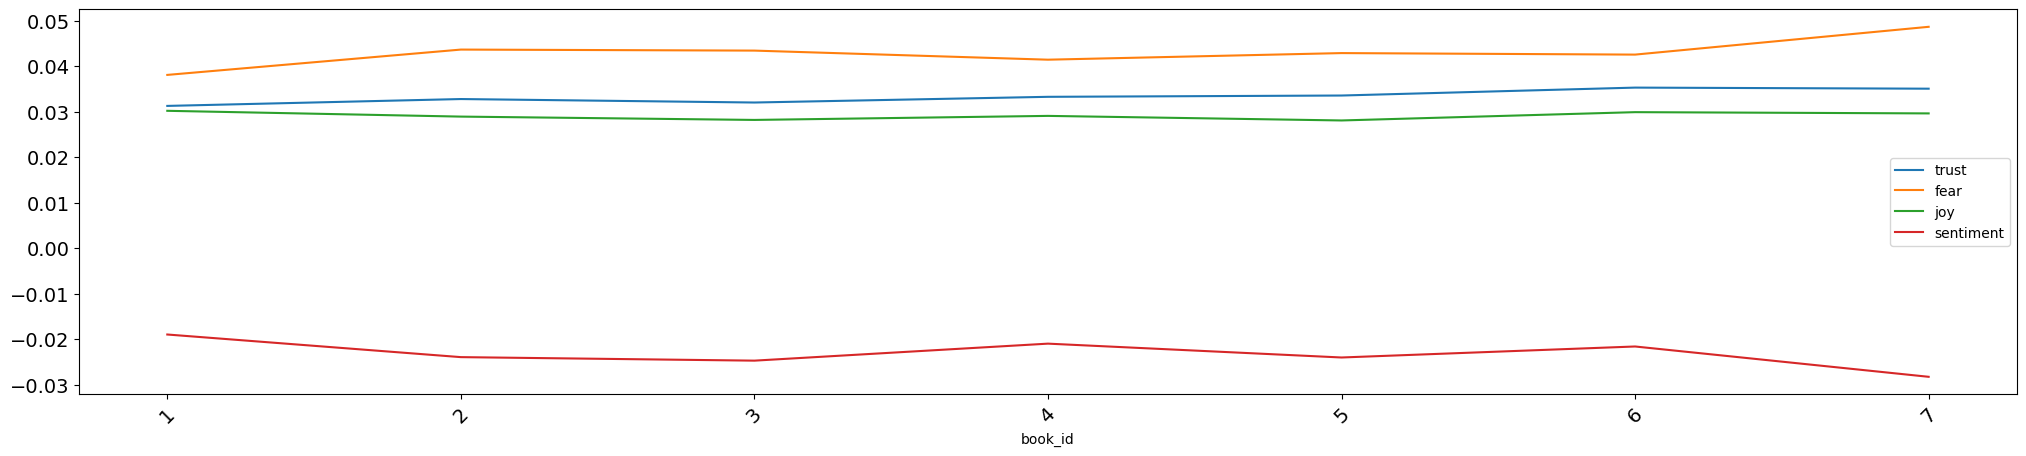

In [178]:
plot_sentiments(DOCSENT, ['trust','fear','joy','sentiment'])

## VOCAB_W2V

In [215]:
from gensim.models import word2vec
from sklearn.manifold import TSNE
import plotly_express as px
import gensim

In [271]:
VOCAB = VOCAB[~VOCAB.index.isna()]

In [272]:
VOCAB.sample(5)

,n,n_chars,p,i,max_pos,max_pos_group,n_pos,cat_pos,stop,porter_stem,...,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust,sentiment
term_str,,,,,,,,,,,,,,,,,,,,,
dem,4,3,3.677640e-06,18.052788,NNP,NN,2,"{NNP, JJ}",0,dem,...,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0
shut,279,4,2.565154e-04,11.928667,NN,VB,10,"{VB, NNS, JJ, VBP, VBN, VBZ, VBD, NN, NNP, RB}",0,shut,...,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0
vents,1,5,9.194100e-07,20.052788,NN,NN,1,{NN},0,vent,...,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0
voldermorts,1,11,9.194100e-07,20.052788,NNP,NN,1,{NNP},0,voldermort,...,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0
adults,7,6,6.435870e-06,17.245433,NNS,NN,2,"{NN, NNS}",0,adult,...,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0


In [273]:
from gensim.corpora import Dictionary

In [274]:
docs = TOKENS[~TOKENS.pos.str.match('NNPS?')].dropna(subset=['term_str'])\
    .groupby(BAG)\
    .term_str.apply(lambda  x:  x.tolist())\
    .reset_index()['term_str'].tolist()
docs = [doc for doc in docs if len(doc) > 1] # Lose single word docs

In [276]:
vocab = Dictionary(docs)

In [278]:
w2v_params = dict(
    window = 5,
    vector_size = 246,
    min_count = 50, # THIS LIMITS OUR VOCAB
    workers = 4
)

In [279]:
model = word2vec.Word2Vec(docs, **w2v_params)

In [281]:
w2v = model.wv.vectors

In [283]:
w2v.tofile('w2v.csv', sep = '|')

In [285]:
def get_vector(row):
    w = row.name
    try:
        vec = model.wv[w]
    except KeyError as e:
        vec = None
    return vec

In [286]:
WV = pd.DataFrame(VOCAB.apply(get_vector, axis=1).dropna()).apply(lambda x: pd.Series(x[0]), axis=1)

In [287]:
WV

,0,1,2,3,4,5,6,7,8,9,...,236,237,238,239,240,241,242,243,244,245
term_str,,,,,,,,,,,,,,,,,,,,,
a,-0.720008,-0.612264,-0.311844,0.005621,0.349804,-0.091462,-0.999951,0.194841,0.434786,-0.031718,...,-0.383002,-0.281248,0.693411,0.526315,0.641085,0.560709,-0.301671,0.374503,-0.065188,0.156482
able,0.679651,0.473532,-0.329973,-0.592484,-0.025605,0.319504,-0.718360,0.275796,0.475092,0.168596,...,0.026627,0.455215,-0.490247,-0.270707,0.353285,0.311468,-0.282386,0.344321,0.009960,-0.063660
about,-0.148419,-0.202847,-0.965010,-0.046306,-0.054915,0.474246,-0.294693,-0.054749,0.455979,0.042359,...,0.212257,0.002169,-0.282280,-0.611259,-0.344380,0.188655,0.233423,0.365192,0.368625,0.024664
above,-0.121992,-0.689272,-0.255296,-0.040784,-0.403805,-0.037640,-0.426982,-0.322497,-0.657829,-0.632795,...,-0.154013,0.091522,0.034129,-0.103211,0.437842,-0.074575,0.006801,0.109944,0.258015,0.344963
abruptly,-0.023821,0.085513,-0.094106,-0.026981,0.000223,-0.023121,0.065572,0.173633,0.043000,0.071542,...,-0.076296,0.043122,-0.033467,-0.001743,-0.026764,0.014912,0.068129,0.024994,-0.014449,0.094777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
youre,0.490320,-0.029659,-0.408032,0.685720,-0.226903,0.054760,0.320565,0.755405,1.157126,-0.306429,...,-0.335336,-0.259466,0.363198,0.179046,-0.100193,-0.691111,0.182078,-0.477749,0.402459,-0.037663
yours,0.015645,0.016597,-0.112570,0.083977,0.100546,-0.054289,-0.078012,0.001612,0.098192,-0.041446,...,-0.019293,0.017364,0.097730,0.050644,0.115002,0.042937,0.060657,-0.114951,-0.013649,-0.047097
yourself,0.081484,0.206546,-0.095814,0.049759,0.108669,0.042156,0.038925,0.185959,0.282973,0.059474,...,-0.047851,0.048070,-0.025482,0.105117,-0.092802,-0.008237,-0.040318,-0.115984,-0.094497,-0.194371


In [288]:
WV.to_csv(f"{output_dir}WV.csv", index=True, header=True, sep='|')

## tSNE Plot

In [290]:
from sklearn.manifold import TSNE as tsne

In [293]:
tsne_engine = tsne(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
tsne_model = tsne_engine.fit_transform(WV.to_numpy())

In [294]:
TSNE = pd.DataFrame(tsne_model, columns=['x','y'], index=WV.index)

In [296]:
X = TSNE.join(VOCAB, how='left')

In [300]:
px.scatter(X.reset_index(), 'x', 'y', 
           text='term_str', 
           color='max_pos', 
           hover_name='term_str',          
           size='mean_tfidf',
           height=1000).update_traces(
                mode='markers+text', 
                textfont=dict(color='black', size=14, family='Arial'),
                textposition='top center')

## Riff 1

In [331]:
corr_type = 'kendall'
CORR_MATRIX = TFIDF.groupby('book_id').mean().T.corr(corr_type)

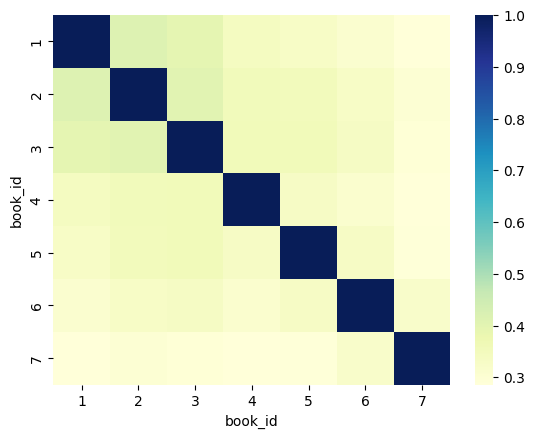

In [332]:
sns.heatmap(CORR_MATRIX, cmap=colors);

In [329]:
TFIDF

term_str               0         1   10   11   12  1230  125  1289  1296  \
book_id chap_id                                                            
1       1        0.00000  0.000000  0.0  0.0  0.0   0.0  0.0   0.0   0.0   
        2        0.00000  0.000000  0.0  0.0  0.0   0.0  0.0   0.0   0.0   
        3        0.00000  0.000000  0.0  0.0  0.0   0.0  0.0   0.0   0.0   
        4        0.00000  0.035675  0.0  0.0  0.0   0.0  0.0   0.0   0.0   
        5        0.04109  0.032551  0.0  0.0  0.0   0.0  0.0   0.0   0.0   
...                  ...       ...  ...  ...  ...   ...  ...   ...   ...   
7       32       0.00000  0.000000  0.0  0.0  0.0   0.0  0.0   0.0   0.0   
        33       0.00000  0.000000  0.0  0.0  0.0   0.0  0.0   0.0   0.0   
        34       0.00000  0.000000  0.0  0.0  0.0   0.0  0.0   0.0   0.0   
        35       0.00000  0.000000  0.0  0.0  0.0   0.0  0.0   0.0   0.0   
        36       0.00000  0.000000  0.0  0.0  0.0   0.0  0.0   0.0   0.0   

term_str         12th  ...  zombie  zone  zonko  zonkos       zoo  zoological  \
book_id chap_id        ...                                                      
1       1         0.0  ...     0.0   0.0    0.0     0.0  0.000000         0.0   
        2         0.0  ...     0.0   0.0    0.0     0.0  0.187645         0.0   
        3         0.0  ...     0.0   0.0    0.0     0.0  0.000000         0.0   
        4         0.0  ...     0.0   0.0    0.0     0.0  0.000000         0.0   
        5         0.0  ...     0.0   0.0    0.0     0.0  0.000000         0.0   
...               ...  ...     ...   ...    ...     ...       ...         ...   
7       32        0.0  ...     0.0   0.0    0.0     0.0  0.000000         0.0   
        33        0.0  ...     0.0   0.0    0.0     0.0  0.000000         0.0   
        34        0.0  ...     0.0   0.0    0.0     0.0  0.000000         0.0   
        35        0.0  ...     0.0   0.0    0.0     0.0  0.000000         0.0   
        36        0.0  ...     0.0   0.0    0.0     0.0  0.000000         0.0   

term_str         zoom    zoomed   zooming  éclairs  
book_id chap_id                                     
1       1         0.0  0.000000  0.000000      0.0  
        2         0.0  0.000000  0.000000      0.0  
        3         0.0  0.000000  0.000000      0.0  
        4         0.0  0.000000  0.000000      0.0  
        5         0.0  0.000000  0.000000      0.0  
...               ...       ...       ...      ...  
7       32        0.0  0.006542  0.008202      0.0  
        33        0.0  0.000000  0.000000      0.0  
        34        0.0  0.000000  0.000000      0.0  
        35        0.0  0.000000  0.000000      0.0  
        36        0.0  0.000000  0.005959      0.0  

[198 rows x 21615 columns]

In [330]:
TFIDF.groupby('book_id').mean()

term_str,0,1,10,11,12,1230,125,1289,1296,12th,...,zombie,zone,zonko,zonkos,zoo,zoological,zoom,zoomed,zooming,éclairs
book_id,,,,,,,,,,,,,,,,,,,,,
1,0.004388,0.004013,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.005342,0.000000,0.000000,0.000000,0.012216,0.000000,0.001064,0.000547,0.001552,0.000000
2,0.000000,0.001311,0.000000,0.000000,0.000000,0.001643,0.000000,0.001999,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.003620,0.000000,0.000000,0.001072,0.000000,0.000000
3,0.000000,0.002757,0.000000,0.004349,0.000000,0.000000,0.001204,0.000000,0.001683,0.000000,...,0.001205,0.000000,0.001387,0.008501,0.000000,0.000000,0.000000,0.003642,0.001511,0.000000
4,0.001728,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000378,0.000000,0.000889,0.001547,0.003027,0.004278,0.000000
5,0.000000,0.000355,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001493,...,0.000000,0.000797,0.000000,0.001677,0.000000,0.000000,0.000751,0.004681,0.001715,0.000000
6,0.000000,0.001125,0.001025,0.000000,0.000935,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.001318,0.000000,0.000000,0.000000,0.002262,0.000724,0.001695
7,0.000000,0.000655,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000402,0.001308,0.001104,0.000000


## Riff 2

In [346]:
LIB

,source_file_path,title,book_len,n_chaps,chap_regex,release_year
book_id,,,,,,
1,/Users/michaelhammer/Desktop/ETA_Final/novels/...,Harry Potter And The Sorcerer's Stone,77946,17,^CHAPTER\s,1997
2,/Users/michaelhammer/Desktop/ETA_Final/novels/...,Harry Potter And The Chamber of Secrets,87122,18,^CHAPTER\s,1998
3,/Users/michaelhammer/Desktop/ETA_Final/novels/...,Harry Potter And The Prisoner of Azkaban,105599,22,^CHAPTER\s,1999
4,/Users/michaelhammer/Desktop/ETA_Final/novels/...,Harry Potter And The Goblet of Fire,192543,37,^CHAPTER\s,2000
5,/Users/michaelhammer/Desktop/ETA_Final/novels/...,Harry Potter And The Order Of The Phoenix,263038,38,^CHAPTER\s,2003
6,/Users/michaelhammer/Desktop/ETA_Final/novels/...,Harry Potter And The Half Blood Prince,172720,30,^CHAPTER\s,2005
7,/Users/michaelhammer/Desktop/ETA_Final/novels/...,Harry Potter And The Deathly Hallows,201393,36,^CHAPTER\s|^EPILOGUE\s,2007


In [347]:
def hac(sims, linkage_method='complete', color_thresh=.3, figsize=(10, 10)):

    # Generate the clustering
    tree = sch.linkage(sims, method=linkage_method)
    
    # Get labels for the leaves
    labels = LIB.title.values
    
    # Create a figure 
    plt.figure()
    fig, axes = plt.subplots(figsize=figsize)
    
    # Create a dendrogram with the tree
    dendrogram = sch.dendrogram(tree, 
                                labels=labels, 
                                orientation="left", 
                                count_sort=True,
                                distance_sort=True,
                                above_threshold_color='.75',
                                color_threshold=color_thresh
                               )
    
    # Change the appearance of ticks, tick labels, and gridlines
    plt.tick_params(axis='both', which='major', labelsize=14)

In [334]:
PAIRS = pd.DataFrame(index=pd.MultiIndex.from_product([LIB.index.tolist(), LIB.index.tolist()])).reset_index()

In [335]:
PAIRS = PAIRS[PAIRS.level_0 < PAIRS.level_1].set_index(['level_0','level_1'])

In [336]:
PAIRS.index.names = ['doc_a', 'doc_b']

In [338]:
from numpy.linalg import norm
from scipy.spatial.distance import pdist
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

In [343]:
TFIDF_C = TFIDF.groupby(OHCO[:1]).mean()
L0 = TFIDF_C.astype('bool').astype('int') # Binary (Pseudo L)
L1 = TFIDF_C.apply(lambda x: x / x.sum(), 1) # Probabilistic
L2 = TFIDF_C.apply(lambda x: x / norm(x), 1) # Pythagorean, AKA Euclidean

In [344]:
PAIRS['cityblock'] = pdist(TFIDF_C, 'cityblock')
PAIRS['euclidean'] = pdist(TFIDF_C, 'euclidean')
PAIRS['cosine'] = pdist(TFIDF_C, 'cosine')
PAIRS['jaccard'] = pdist(L0, 'jaccard')
PAIRS['dice'] = pdist(L0, 'dice')
PAIRS['js'] = pdist(L1, 'jensenshannon')  

<Figure size 640x480 with 0 Axes>

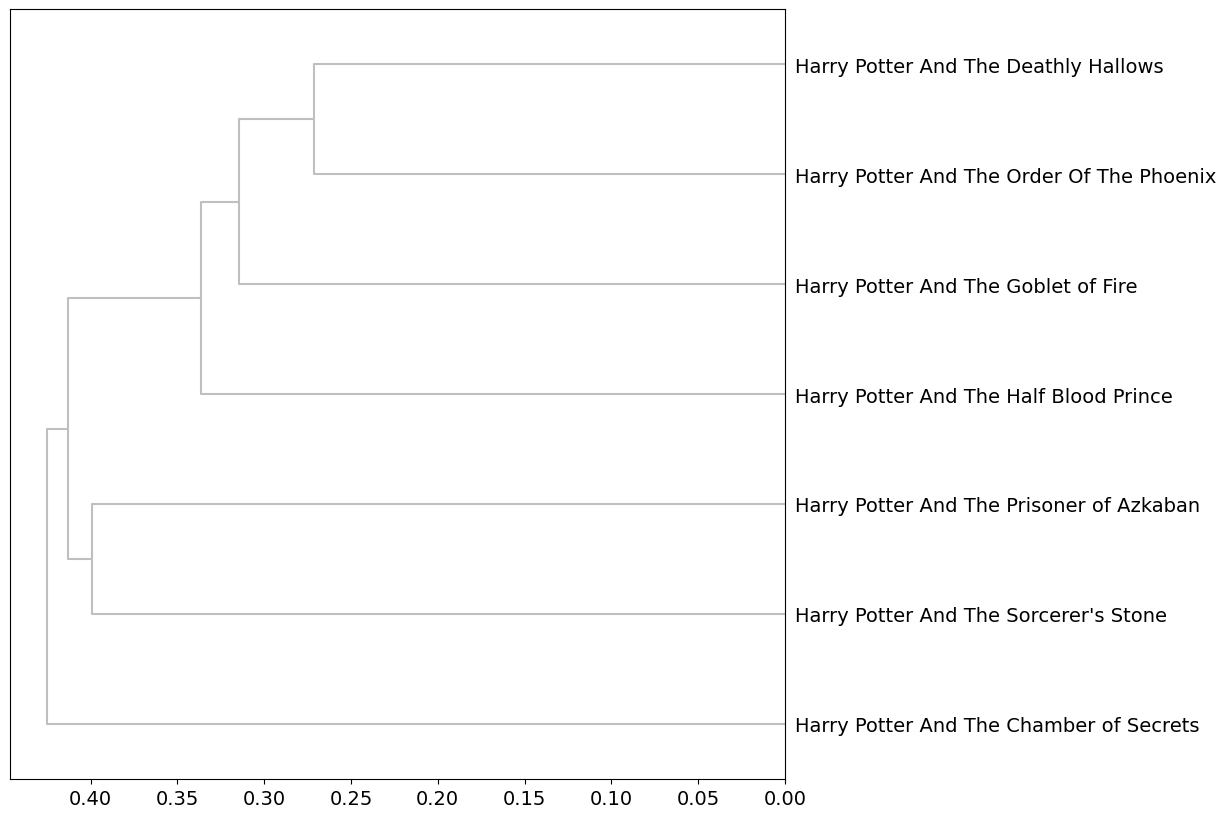

In [349]:
hac(PAIRS.euclidean, linkage_method='ward', color_thresh=.04);

## Riff 3

In [352]:
TOPICS = PHI.stack().groupby('topic_id')\
    .apply(lambda x: ' '.join(x.sort_values(ascending=False).head(n_top_terms).reset_index().term_str))\
    .to_frame('top_terms')

In [353]:
TOPICS

,top_terms
topic_id,
0,wand face eyes castle ground air light way head
1,sir trunk bed dobby cage bus hand window eyes
2,wand eyes voice face egg hand room way moment
3,elf house car locket room letter window things...
4,time door room voice face hand table bit head
5,people time right way room yeah face eyes look
6,time wand voice eyes face door room hand moment
7,goblin wand goblins vault sword time dragon ey...
8,water wand rock lake hand voice centaurs eyes ...


In [361]:
DOC = pd.DataFrame(index=TFIDF.index).join(LIB)

In [362]:
DOC

source_file_path  \
book_id chap_id                                                      
1       1        /Users/michaelhammer/Desktop/ETA_Final/novels/...   
        2        /Users/michaelhammer/Desktop/ETA_Final/novels/...   
        3        /Users/michaelhammer/Desktop/ETA_Final/novels/...   
        4        /Users/michaelhammer/Desktop/ETA_Final/novels/...   
        5        /Users/michaelhammer/Desktop/ETA_Final/novels/...   
...                                                            ...   
7       32       /Users/michaelhammer/Desktop/ETA_Final/novels/...   
        33       /Users/michaelhammer/Desktop/ETA_Final/novels/...   
        34       /Users/michaelhammer/Desktop/ETA_Final/novels/...   
        35       /Users/michaelhammer/Desktop/ETA_Final/novels/...   
        36       /Users/michaelhammer/Desktop/ETA_Final/novels/...   

                                                 title  book_len  n_chaps  \
book_id chap_id                                                             
1       1        Harry Potter And The Sorcerer's Stone     77946       17   
        2        Harry Potter And The Sorcerer's Stone     77946       17   
        3        Harry Potter And The Sorcerer's Stone     77946       17   
        4        Harry Potter And The Sorcerer's Stone     77946       17   
        5        Harry Potter And The Sorcerer's Stone     77946       17   
...                                                ...       ...      ...   
7       32        Harry Potter And The Deathly Hallows    201393       36   
        33        Harry Potter And The Deathly Hallows    201393       36   
        34        Harry Potter And The Deathly Hallows    201393       36   
        35        Harry Potter And The Deathly Hallows    201393       36   
        36        Harry Potter And The Deathly Hallows    201393       36   

                             chap_regex  release_year  
book_id chap_id                                        
1       1                    ^CHAPTER\s          1997  
        2                    ^CHAPTER\s          1997  
        3                    ^CHAPTER\s          1997  
        4                    ^CHAPTER\s          1997  
        5                    ^CHAPTER\s          1997  
...                                 ...           ...  
7       32       ^CHAPTER\s|^EPILOGUE\s          2007  
        33       ^CHAPTER\s|^EPILOGUE\s          2007  
        34       ^CHAPTER\s|^EPILOGUE\s          2007  
        35       ^CHAPTER\s|^EPILOGUE\s          2007  
        36       ^CHAPTER\s|^EPILOGUE\s          2007  

[198 rows x 6 columns]

In [373]:
LABELS = ['source_file_path', 'title', 'book_len', 'n_chaps', 'chap_regex',
       'release_year']

In [380]:
MB = TopicExplorer(TOKENS, LIB, PARA, LABELS).generate_tables()

BAG: para_num
LABELS: ['source_file_path', 'title', 'book_len', 'n_chaps', 'chap_regex', 'release_year']
Getting DOCS
Getting TERMS
Getting THETA, PHI
Getting TOPICS
Binding LIB labels to THETA
Done.


In [375]:
MP.TOPICS['phi_p'] = MP.PHI.T.sum() / MP.PHI.T.sum().sum()
MP.TOPICS['phi_h'] = MP.TOPICS.phi_p * np.log2(1/MP.TOPICS.phi_p)
MP.TOPICS.phi_h.sum()

4.300836296352832

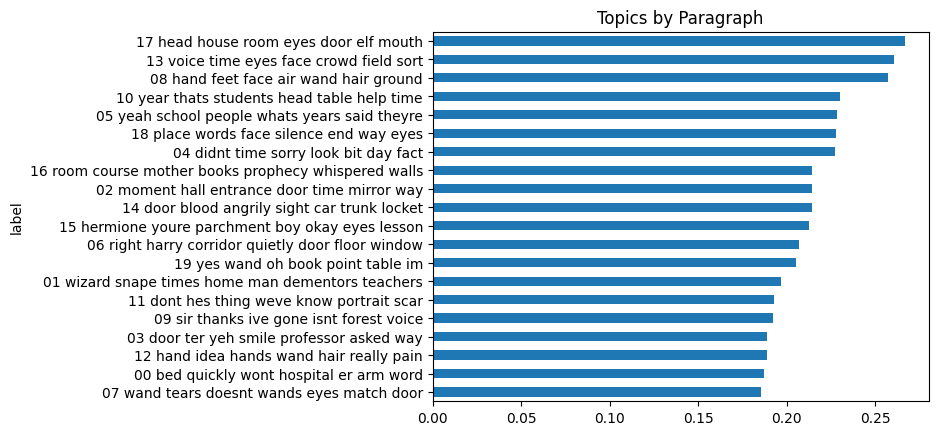

In [376]:
MP.TOPICS.reset_index().set_index('label').phi_h.sort_values().plot.barh(title="Topics by Paragraph");

In [377]:
MC.TOPICS['phi_p'] = MC.PHI.T.sum() / MC.PHI.T.sum().sum()
MC.TOPICS['phi_h'] = MC.TOPICS.phi_p * np.log2(1/MC.TOPICS.phi_p)

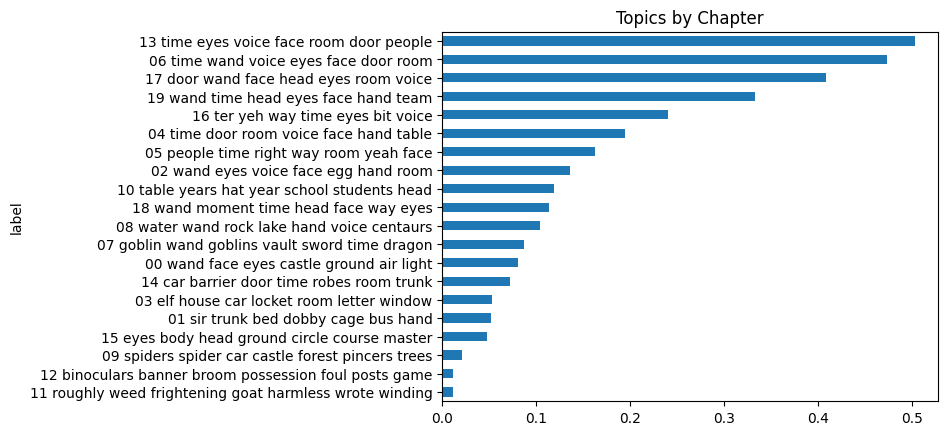

In [378]:
MC.TOPICS.reset_index().set_index('label').phi_h.sort_values().plot.barh(title="Topics by Chapter");